<div class="alert alert-success">
    
## Практическое домашнее задание 2:

  Линейная регрессия, scikit-learn

### Общая информация


Мягкий дедлайн и Жесткий дедлайн см. на странице в `notion`

**Материалы**

- [Документация](http://docs.scipy.org/doc/) по библиотекам NumPy и SciPy
- [Документация](http://matplotlib.org/) по библиотеке Matplotlib
- [Документация](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) по библиотеке Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Документация](http://stanford.edu/~mwaskom/software/seaborn/) по библиотеке Seaborn

Библиотека **Sklearn:**

sklearn.liner_model

linear_model:

- RidgeClassifier
- SGDClassifier
- SGDRegressor
- LinearRegression
- LogisticRegression
- Lasso
и т.д.

Документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

### О задании
В этом задании нужно будет проанализировать данные и выделить из них полезные признаки. Кроме того, мы рассмотрим различные аспекты построения линейной модели

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Стоит обратить внимание**, что в каждом подразделе этого домашнего задания присутствуют не только задачи, но и вопросы. Вопросы расширяют задачи и ориентированы на интерпретируемость и обоснование вашего кода. Поэтому отвечать на них является обязательным условием. За отсутствие выводов и ответов на вопросы баллы могут быть снижены. Ну и в другом случае, если Вы, напротив, ответите на вопросы, но не напишете корректный код к соответствующим задачам, то баллы за такое выставляться не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы.

### Формат сдачи
Присылать необходимо ноутбук с выполненным заданием в гугл форму, ссылка на которую будет выложена в ноушне. Сам ноутбук называйте в формате hw-sirius-02-linregr-Username.ipynb, где Username — ваша фамилия.  

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

#   Линейная регрессия. Часть 1. (5 баллов)

### Подготовка данных (2 балла + включая ответы на вопросы)

**Задание 1.1**. В данном разделе будем выделять признаки из такого датасета: [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview).
Цель: предсказать длительность поездки на такси.
Следует скачать обучающую выборку из этого соревнования и загрузить ее:

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("train.csv")
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Важно: в данных имеются стоблцы `pickup_datetime` и `dropoff_datetime`. Колонку `dropoff_datetime` следует удалить, поскольку она была добавлена организаторами соревнования на `kaggle` только в обучающую выборку и ее, соотвественно, нельзя использовать.

В колоноке `pickup_datetime` записаны дата и время начала поездки. Работа с таким типом данных стандартизирована из-за распространенности соответствующих признаков во многих датасетах (хотя подводные камни все же остаются).
В данном случае существует подход - нужно преобразовать данные в `datetime`-объекты.

In [129]:
data.drop(columns=['dropoff_datetime'], inplace=True)
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Следует посмотреть на распределение таргета в обучающей выборке, например, нарисовать гистограмму этой колонки (используйте `plt.yscale('log')`).

И, после этого **ответьте на вопрос**: "Что можете сказать о целевой переменной по гистограмме её значений?:

In [130]:
# Код для улучшения визуализации
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

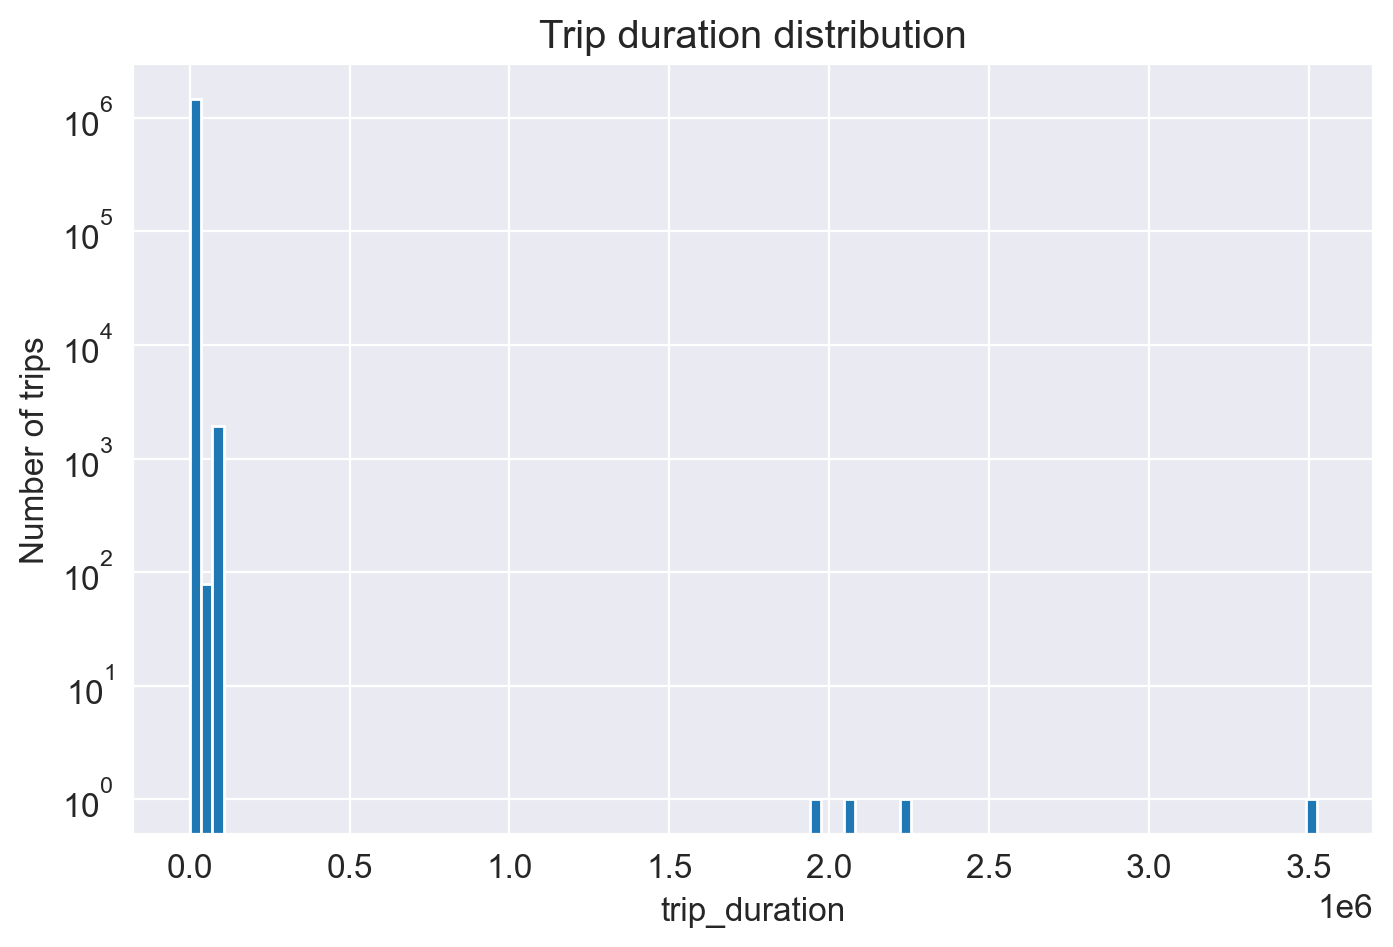

In [131]:

plt.yscale('log')
plt.hist(data['trip_duration'], bins=100)
plt.xlabel('trip_duration')
plt.ylabel('Number of trips')
plt.title('Trip duration distribution')
plt.show()

**Ответ**

В данной выборке есть выбросы, которые сильно влияют на отображаемую диаграмму. В процессе обучения, если мы не собираемся переобучать модель, они не сыграют важной роли. Поэтому, мы перестраиваем гистограмму чтобы просто показать без них.

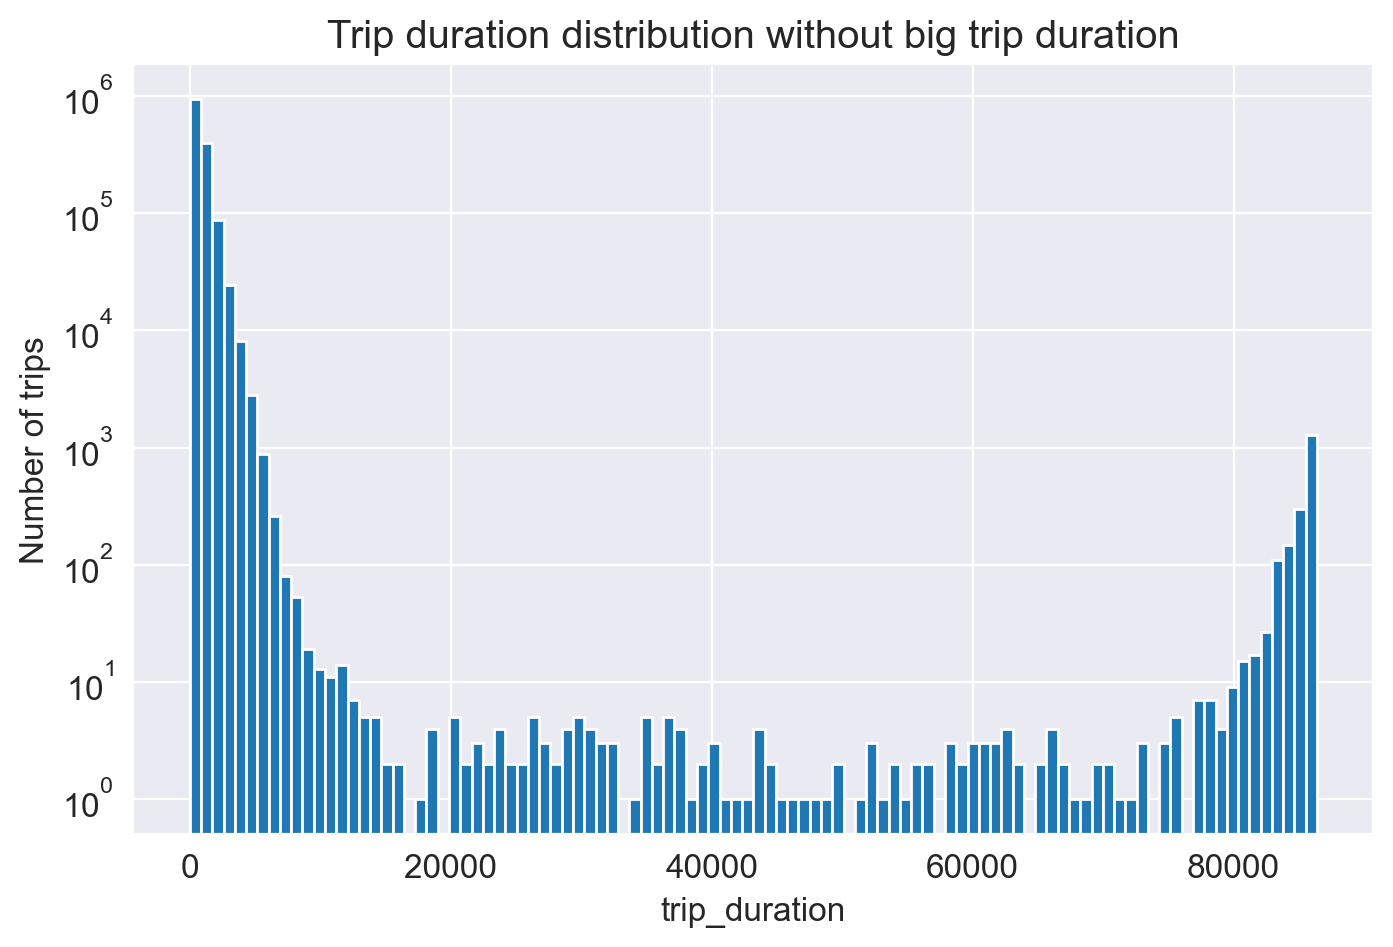

In [132]:
withoutBigTripDuration = data["trip_duration"].copy()
withoutBigTripDuration = withoutBigTripDuration[withoutBigTripDuration < 1000000]
plt.yscale('log')
plt.hist(withoutBigTripDuration, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('Number of trips')
plt.title('Trip duration distribution without big trip duration')
plt.show()

При решении данной задачи в качестве метрики качества использовалась RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему была выбрана в качестве метрики именно RMSLE, а не RMSE? (посмотрите внимательно на формулу и подумайте, почему она в данном конкретном случае, действительно будет являться подходящей метрикой)

**Ответ**

Нам более интересны относительные значения, а не абсолютные. И используемая здесь метрика мягче относится к таким случаям.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, а точнее сказать модификации линейной регресии,и каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ



![Dok-vo.png](Dok-vo.png)

В итоге, наша рассматриваемая задача оптимизации RMSLE была сведена к задаче оптимизации MSE, которую мы вполне умеем решать. Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

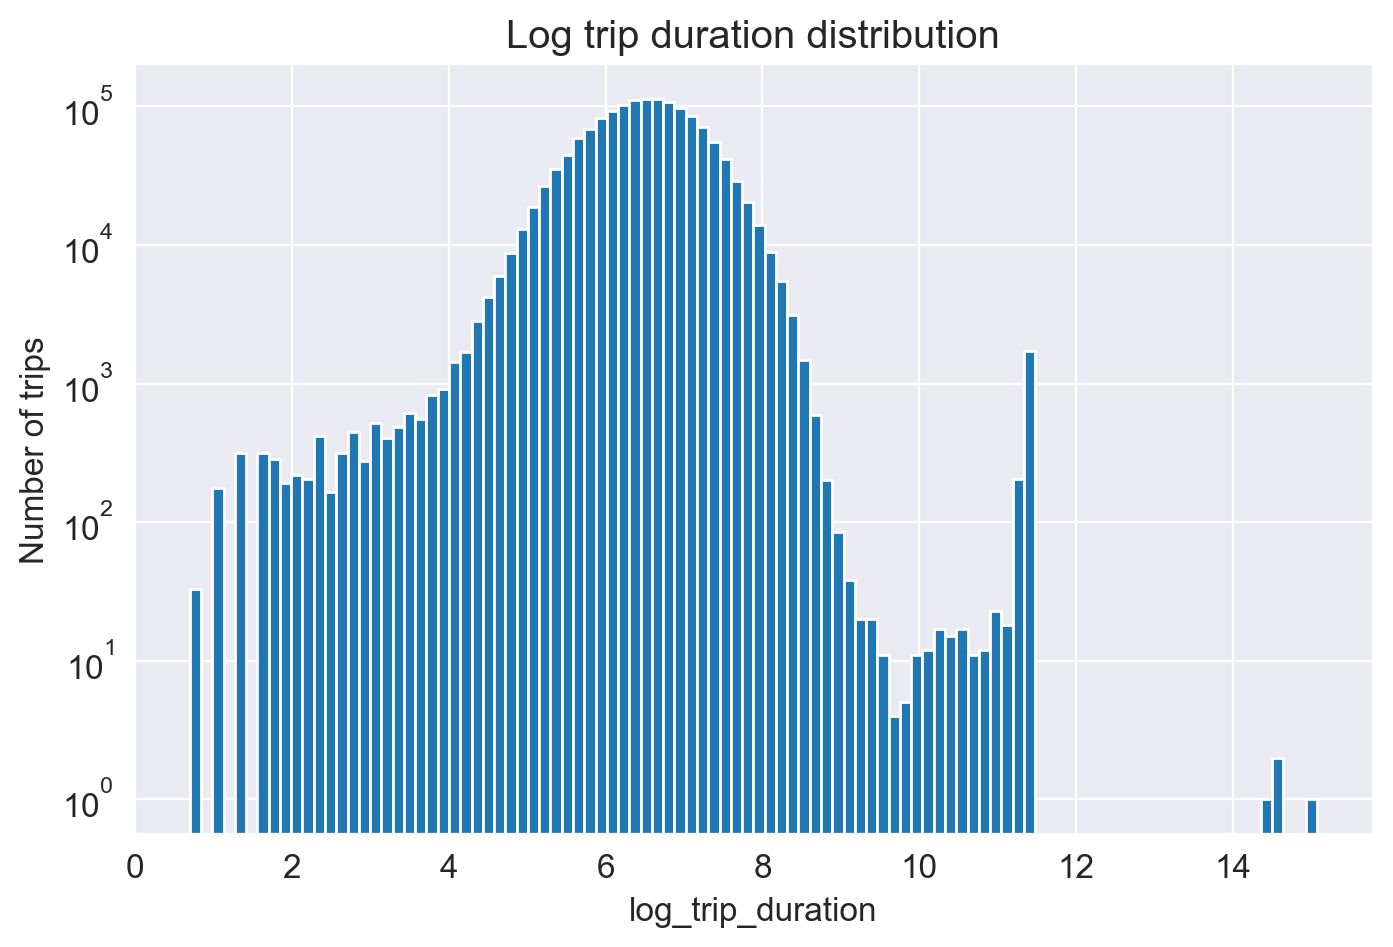

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642


In [133]:
# ваш код здесь
data['log_trip_duration'] = np.log1p(data['trip_duration'])
plt.yscale('log')
plt.hist(data['log_trip_duration'], bins=100)
plt.xlabel('log_trip_duration')
plt.ylabel('Number of trips')
plt.title('Log trip duration distribution')
plt.show()

data = data.drop(['trip_duration'], axis=1)
data.head()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при  константном предсказании:

In [134]:
from sklearn.metrics import root_mean_squared_error

constant_pred_value = 100

y_actual = data['log_trip_duration'].values
y_pred = np.ones_like(y_actual) * np.log1p(constant_pred_value)

print("RMSE = %.4f" % root_mean_squared_error(y_actual, y_pred))

RMSE = 2.0156


## Выделение признаков, визуализация и работа с `pickup_datetime` (3 балла)

                        

**Задание 1.2 (0.5 баллов)**. Первое с чего стоит начать и кажется самым логичным --- это посмотреть, сколько всего было поездок в каждый из дней. Для этого Вам следует построить график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

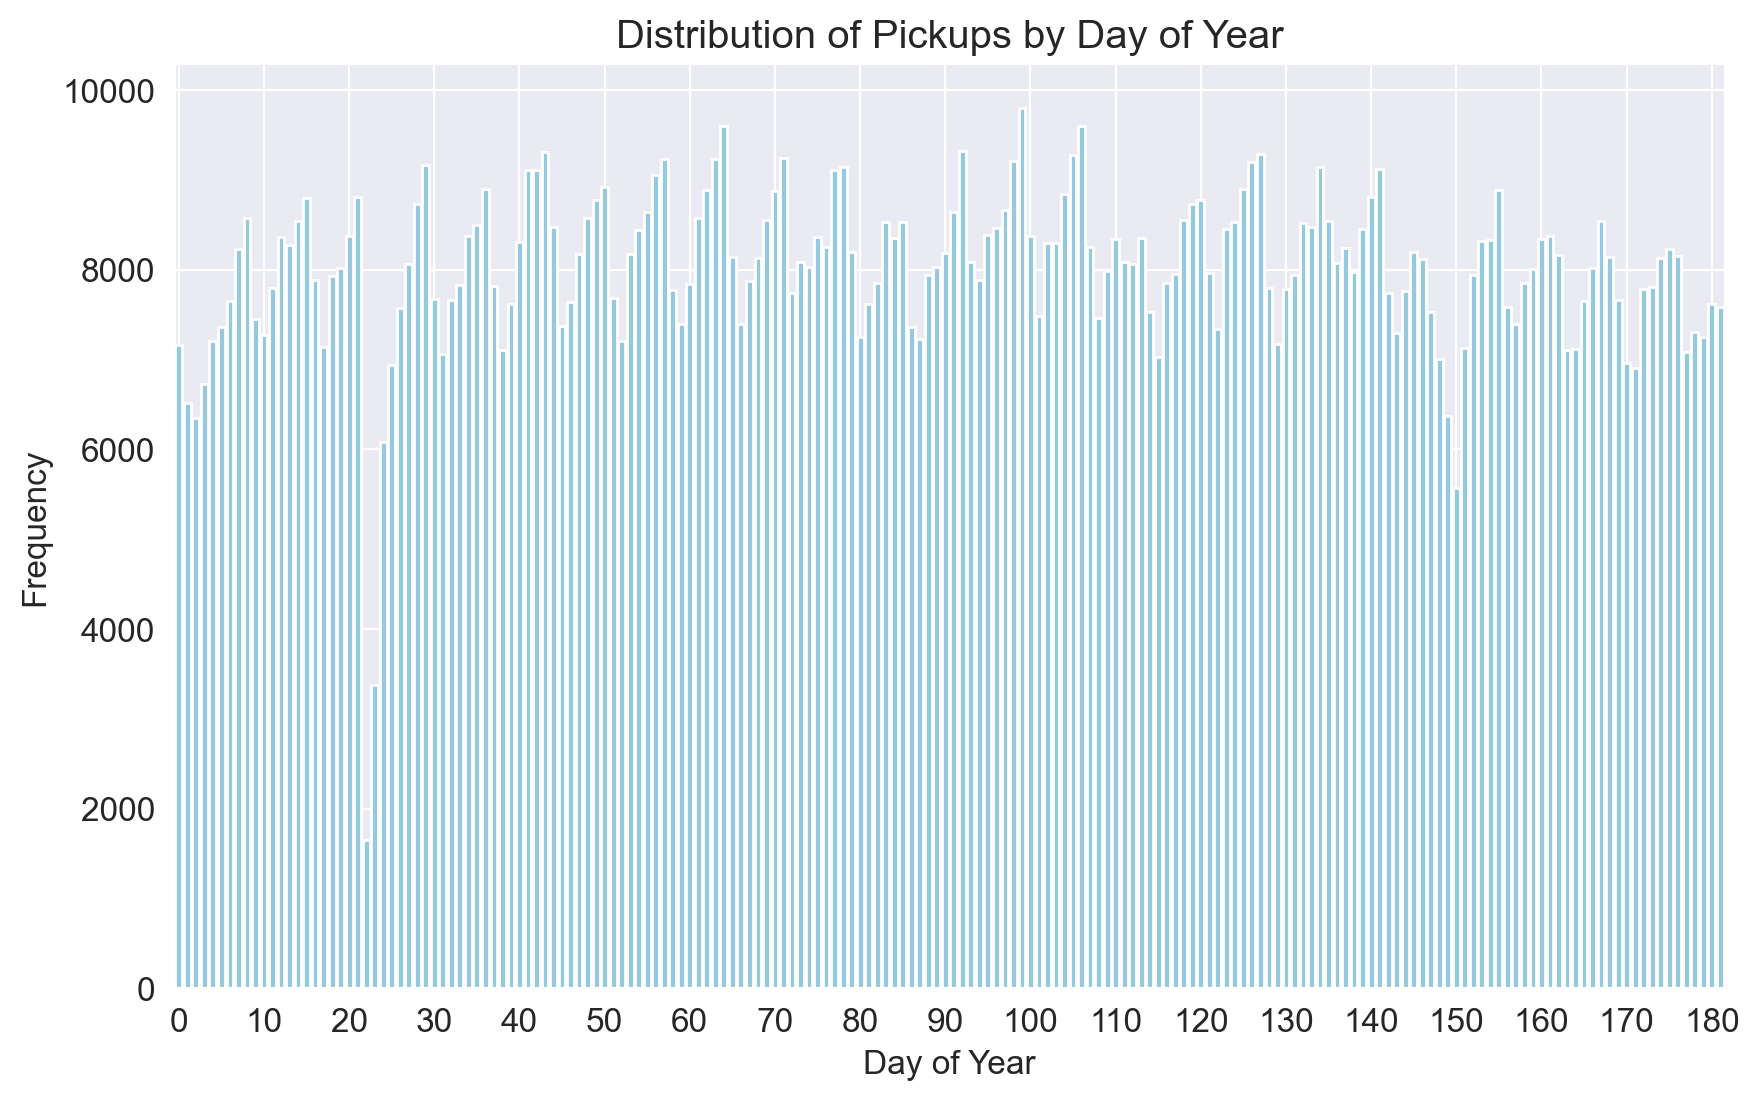

In [135]:
# Добавляем столбец с номером дня в году
data['day_of_year'] = data['pickup_datetime'].dt.dayofyear

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='day_of_year', color='skyblue')

# Устанавливаем метки оси X для каждых N дней
N = 10
labels = ax.get_xticks()
ax.set_xticks(labels[::N])
ax.set_xticklabels(labels[::N])

plt.title('Distribution of Pickups by Day of Year')
plt.xlabel('Day of Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [136]:
# Дни с наименьшим количеством поездок

frequency = data['day_of_year'].value_counts()
frequency.nsmallest(5).index

Index([23, 24, 151, 25, 3], dtype='int32', name='day_of_year')

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

---

**Ответ**

Аномально маленькое количество поездок:
1. 23 день - 23 января - снежная буря, влласти США запретили использование транспорта (https://ria.ru/20160123/1364032228.html)
2. 151 день - 30 мая - День повиновения в США. Могли быть перекрыты дороги 

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

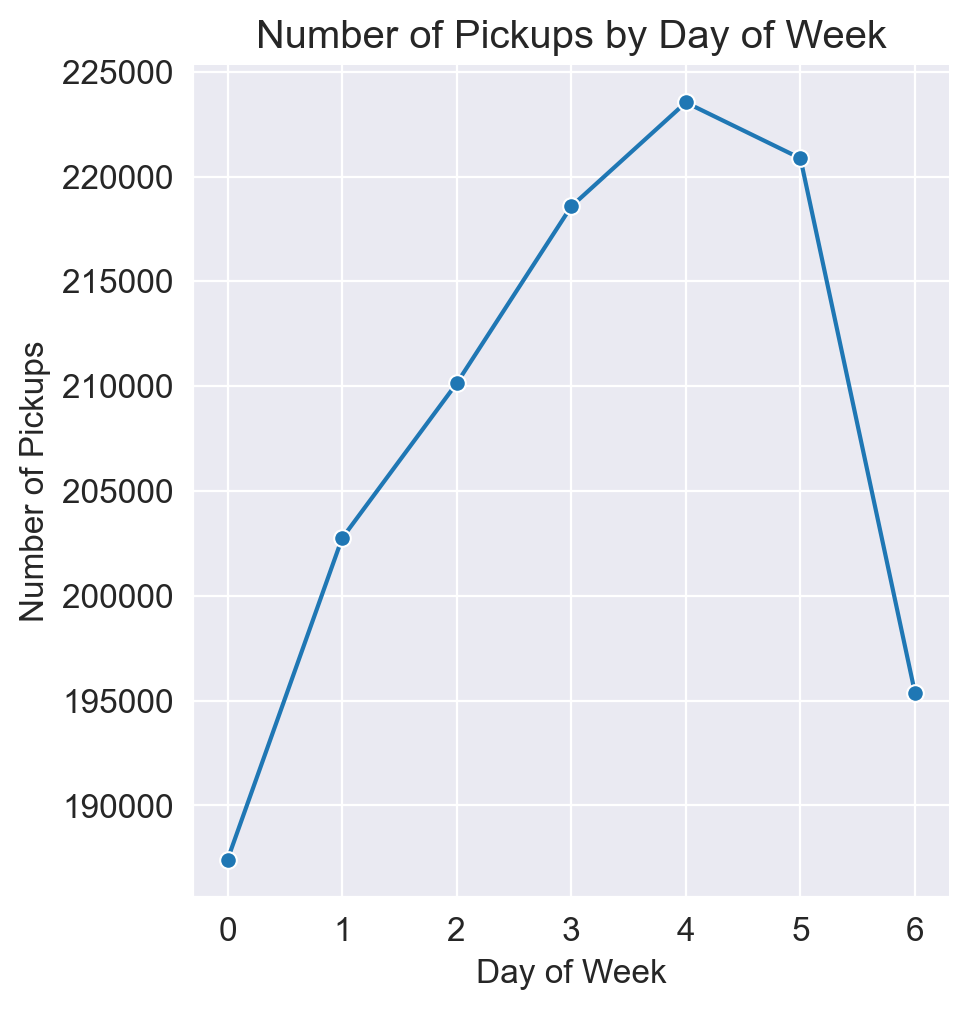

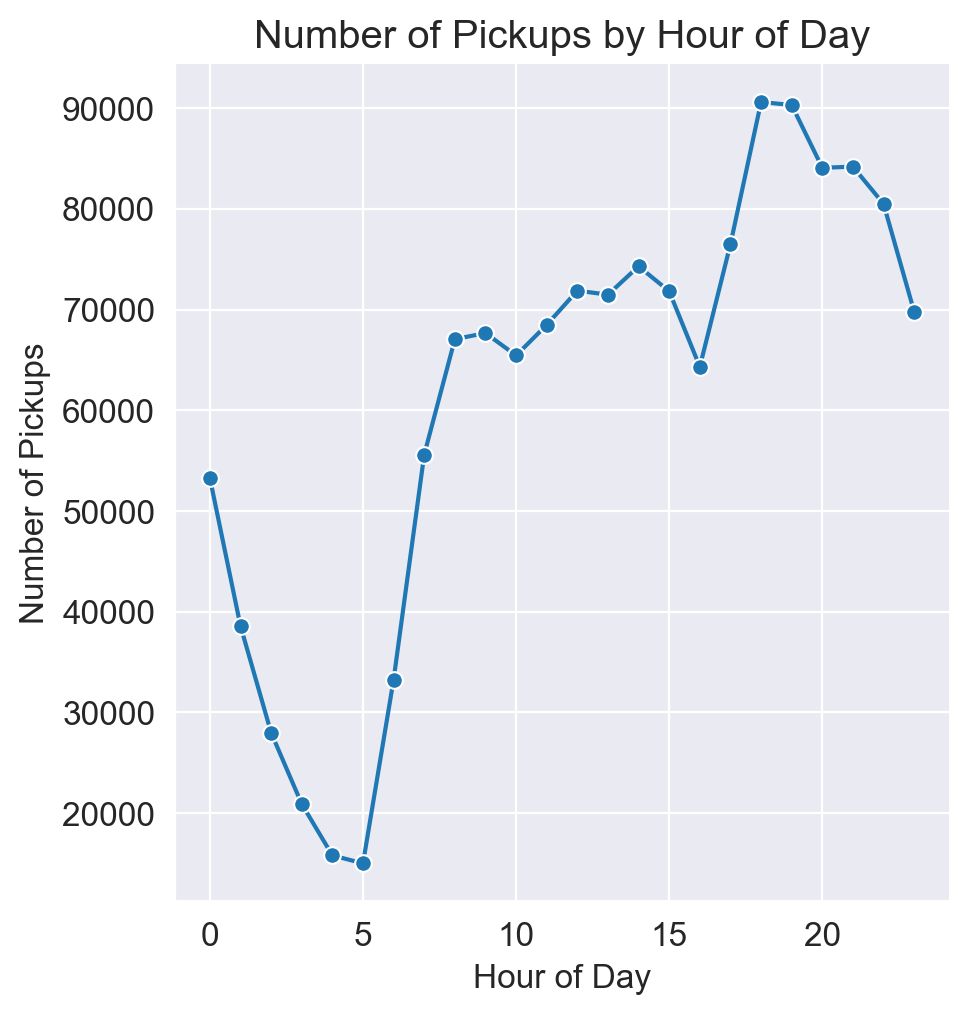

In [137]:
# Добавляем столбцы с днем недели и часом
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
data['hour_of_day'] = data['pickup_datetime'].dt.hour

# График зависимости количества поездок от дня недели
day_of_week = data.groupby('day_of_week').size().reset_index(name='count')
sns.relplot(data=day_of_week, x='day_of_week', y='count', kind='line', marker='o')
plt.title('Number of Pickups by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.show()

# График зависимости количества поездок от дня недели
day_of_week = data.groupby('hour_of_day').size().reset_index(name='count')
sns.relplot(data=day_of_week, x='hour_of_day', y='count', kind='line', marker='o')
plt.title('Number of Pickups by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.show()

**Задание 1.3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

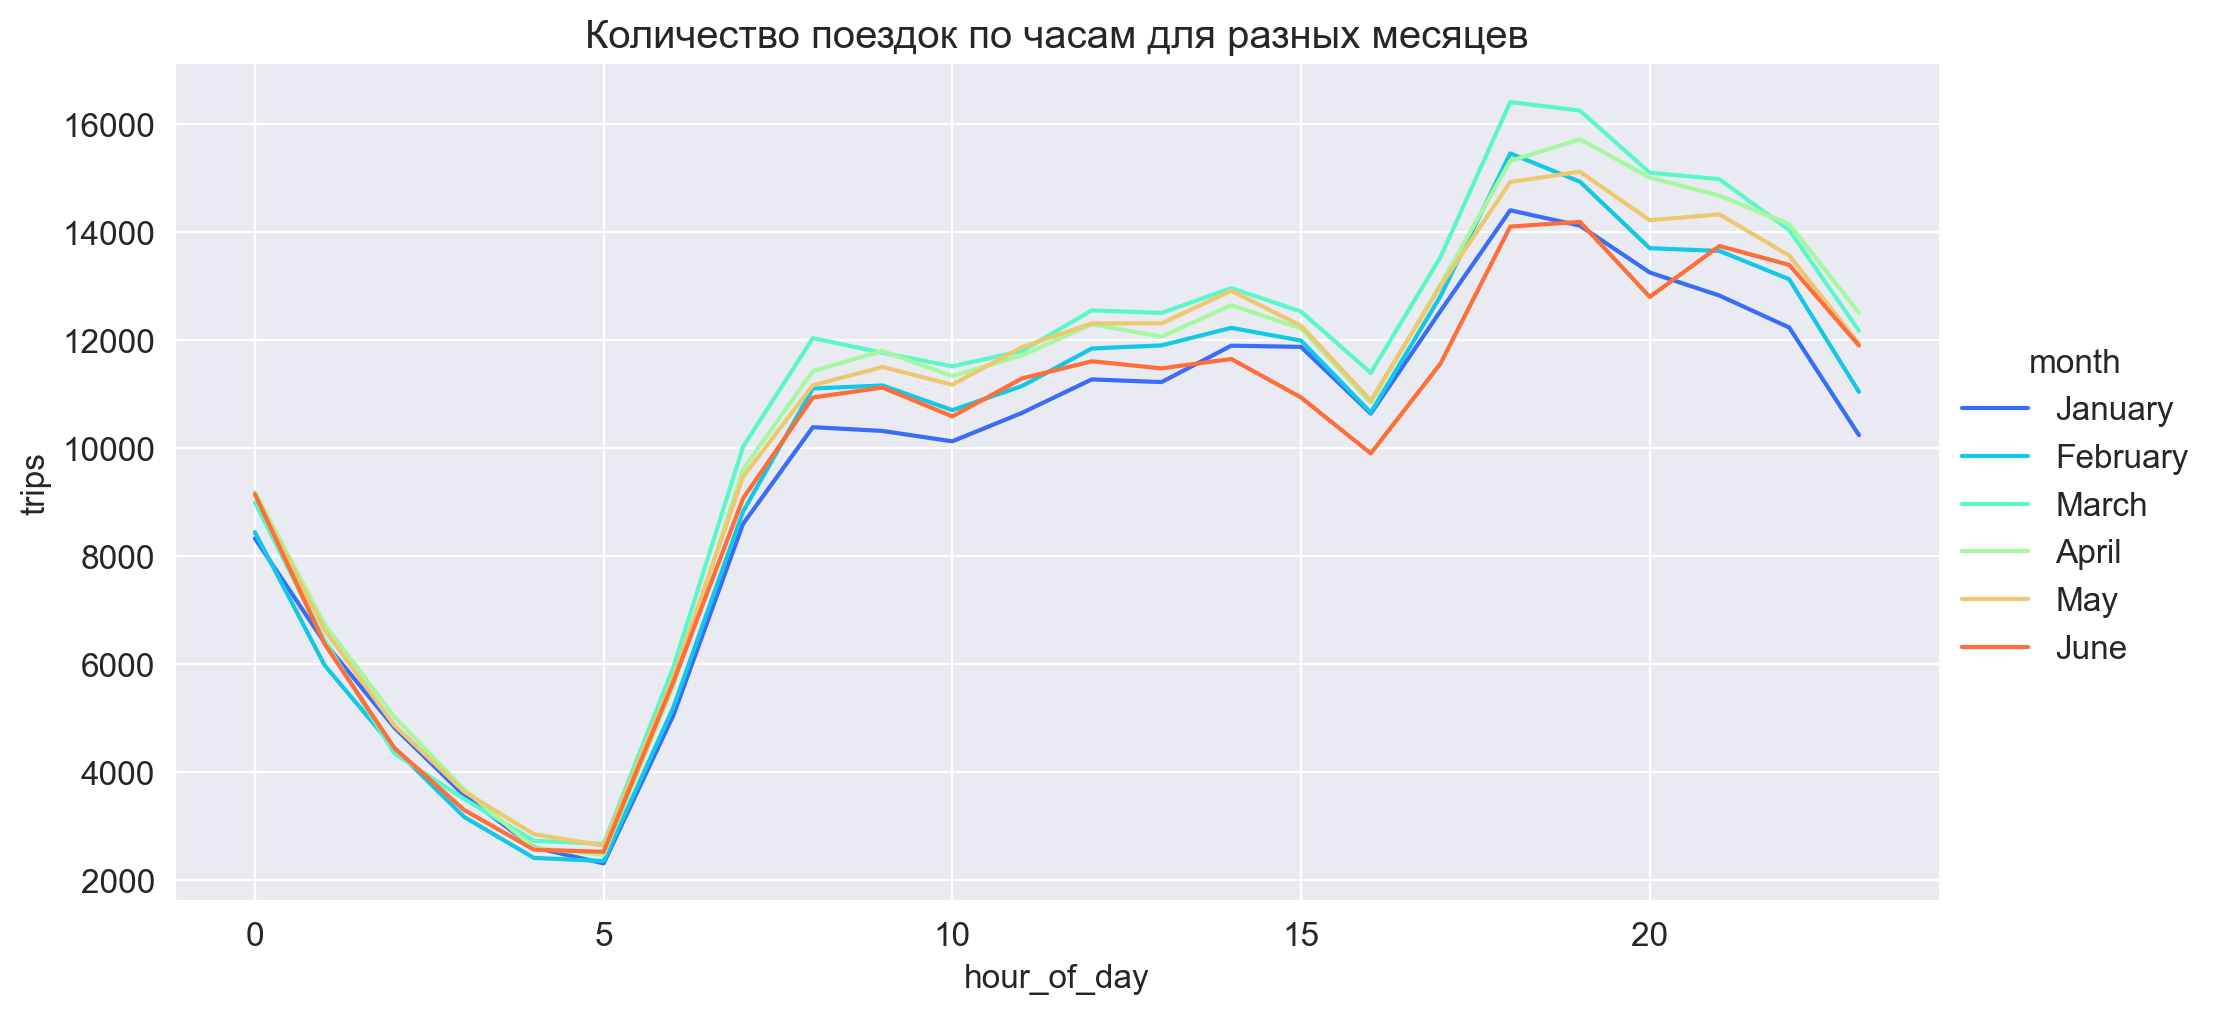

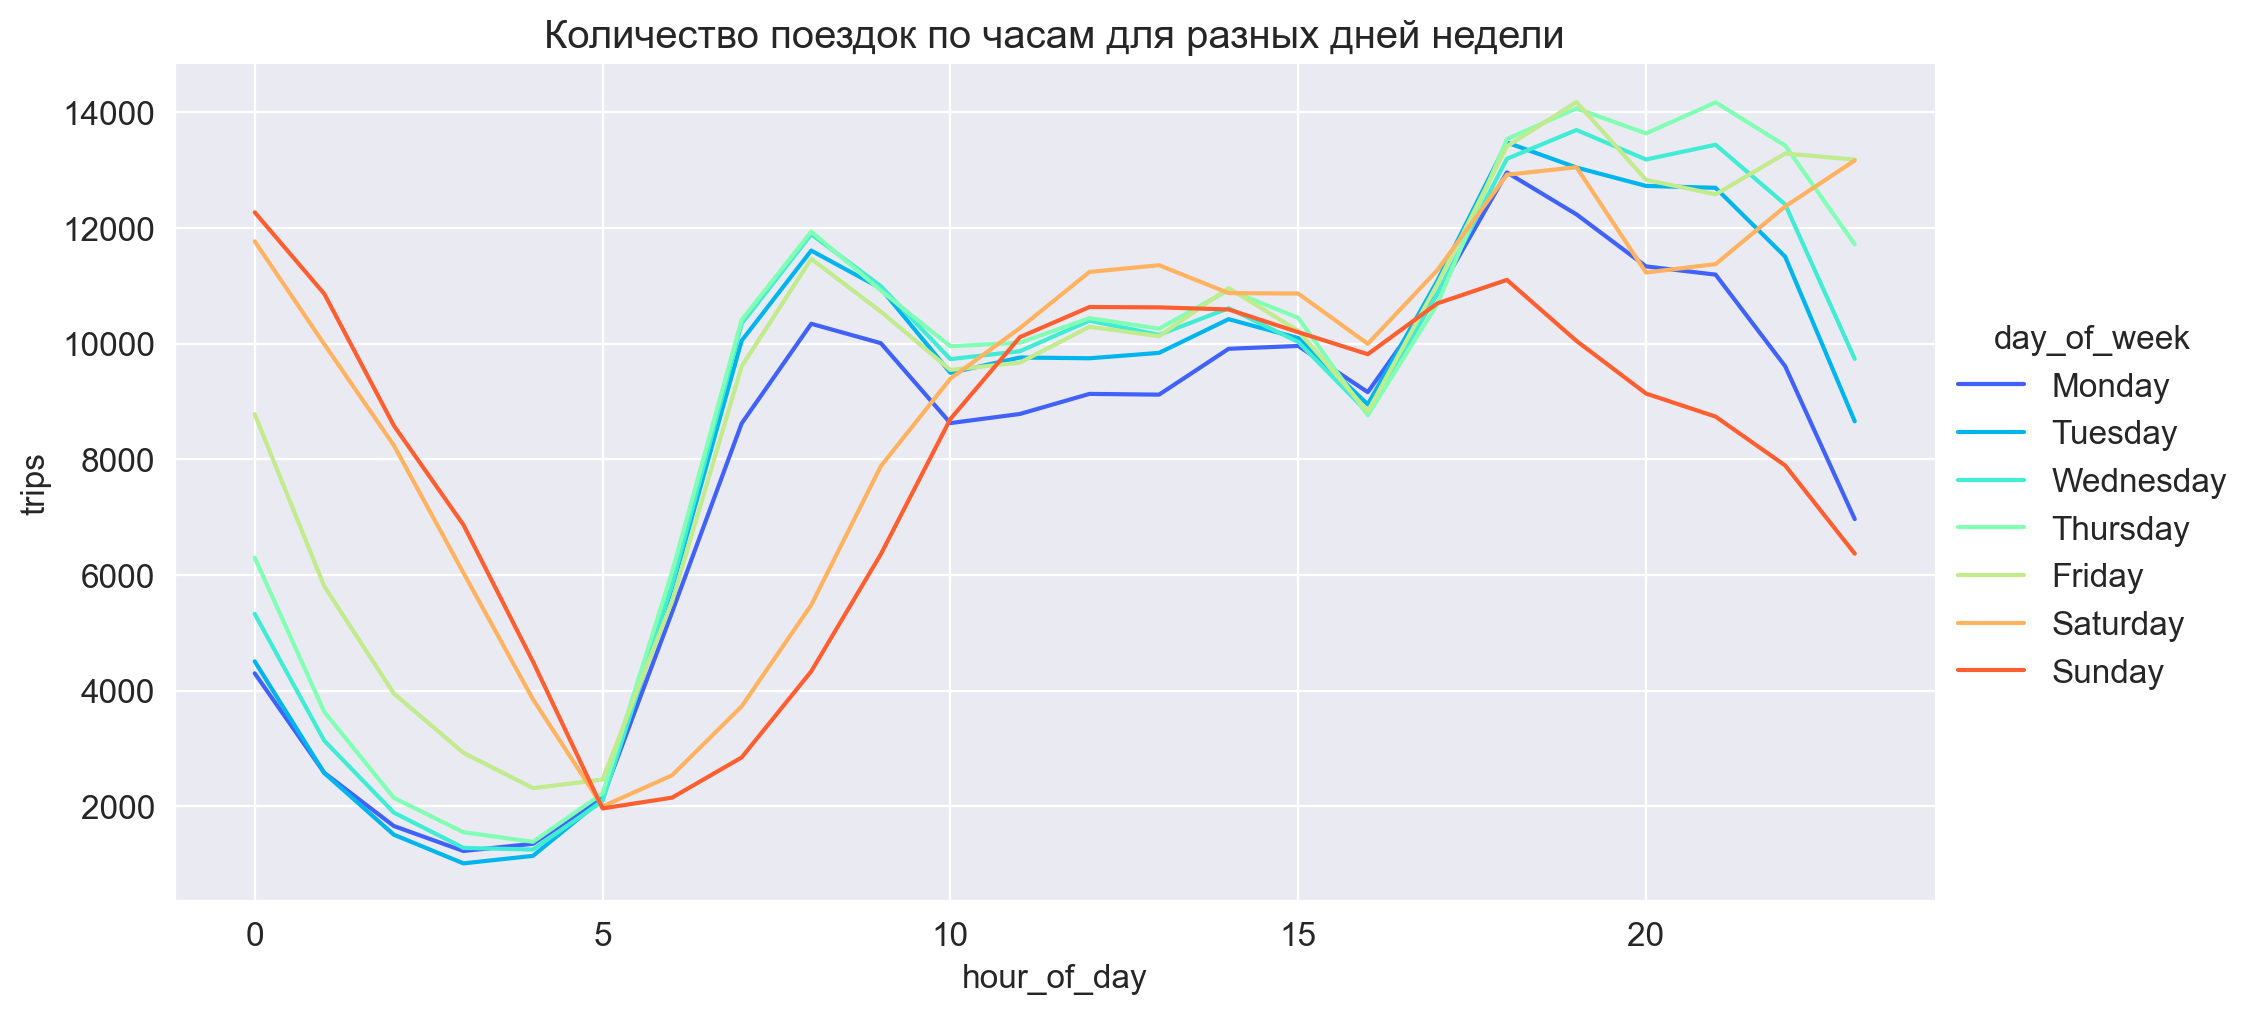

In [138]:
# Добавляем столбцы с днем недели и часом
data['month'] = data['pickup_datetime'].dt.month

# Извлечение и упорядочивание дня недели
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
months = ["January", "February", "March", "April", "May", "June"]
data['day_of_week'] = pd.Categorical(data['pickup_datetime'].dt.day_name(), categories=days, ordered=True)
data['month'] = pd.Categorical(data['pickup_datetime'].dt.month_name(), categories=months, ordered=True)

# Подсчет количества поездок
monthly_trips = data.groupby(['month', 'hour_of_day'], observed=False).size().reset_index(name='trips')

weekly_trips = data.groupby(['day_of_week', 'hour_of_day'], observed=False).size().reset_index(name='trips')

# График по месяцам
sns.relplot(data=monthly_trips, x='hour_of_day', y='trips', kind='line', hue='month', palette='rainbow', aspect=2)
plt.title('Количество поездок по часам для разных месяцев')
plt.show()

# График по дням недели
sns.relplot(data=weekly_trips, x='hour_of_day', y='trips', kind='line', hue='day_of_week', palette='rainbow', aspect=2)
plt.title('Количество поездок по часам для разных дней недели')
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**
Среди дней выделяются выходные - поскольку люди ночью возвращаются с тусовок, при этом утренние часы пользования сдвинуты ближе к полудню; кроме того рост графика более плавный. В целом графики соответствуют распорядку дня человека.

Для месяцев особенных различий не замечено, разве что в Июне меньше всего пользователей - это может быть свзяно с отпуском граждан.


**Задание 1.4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

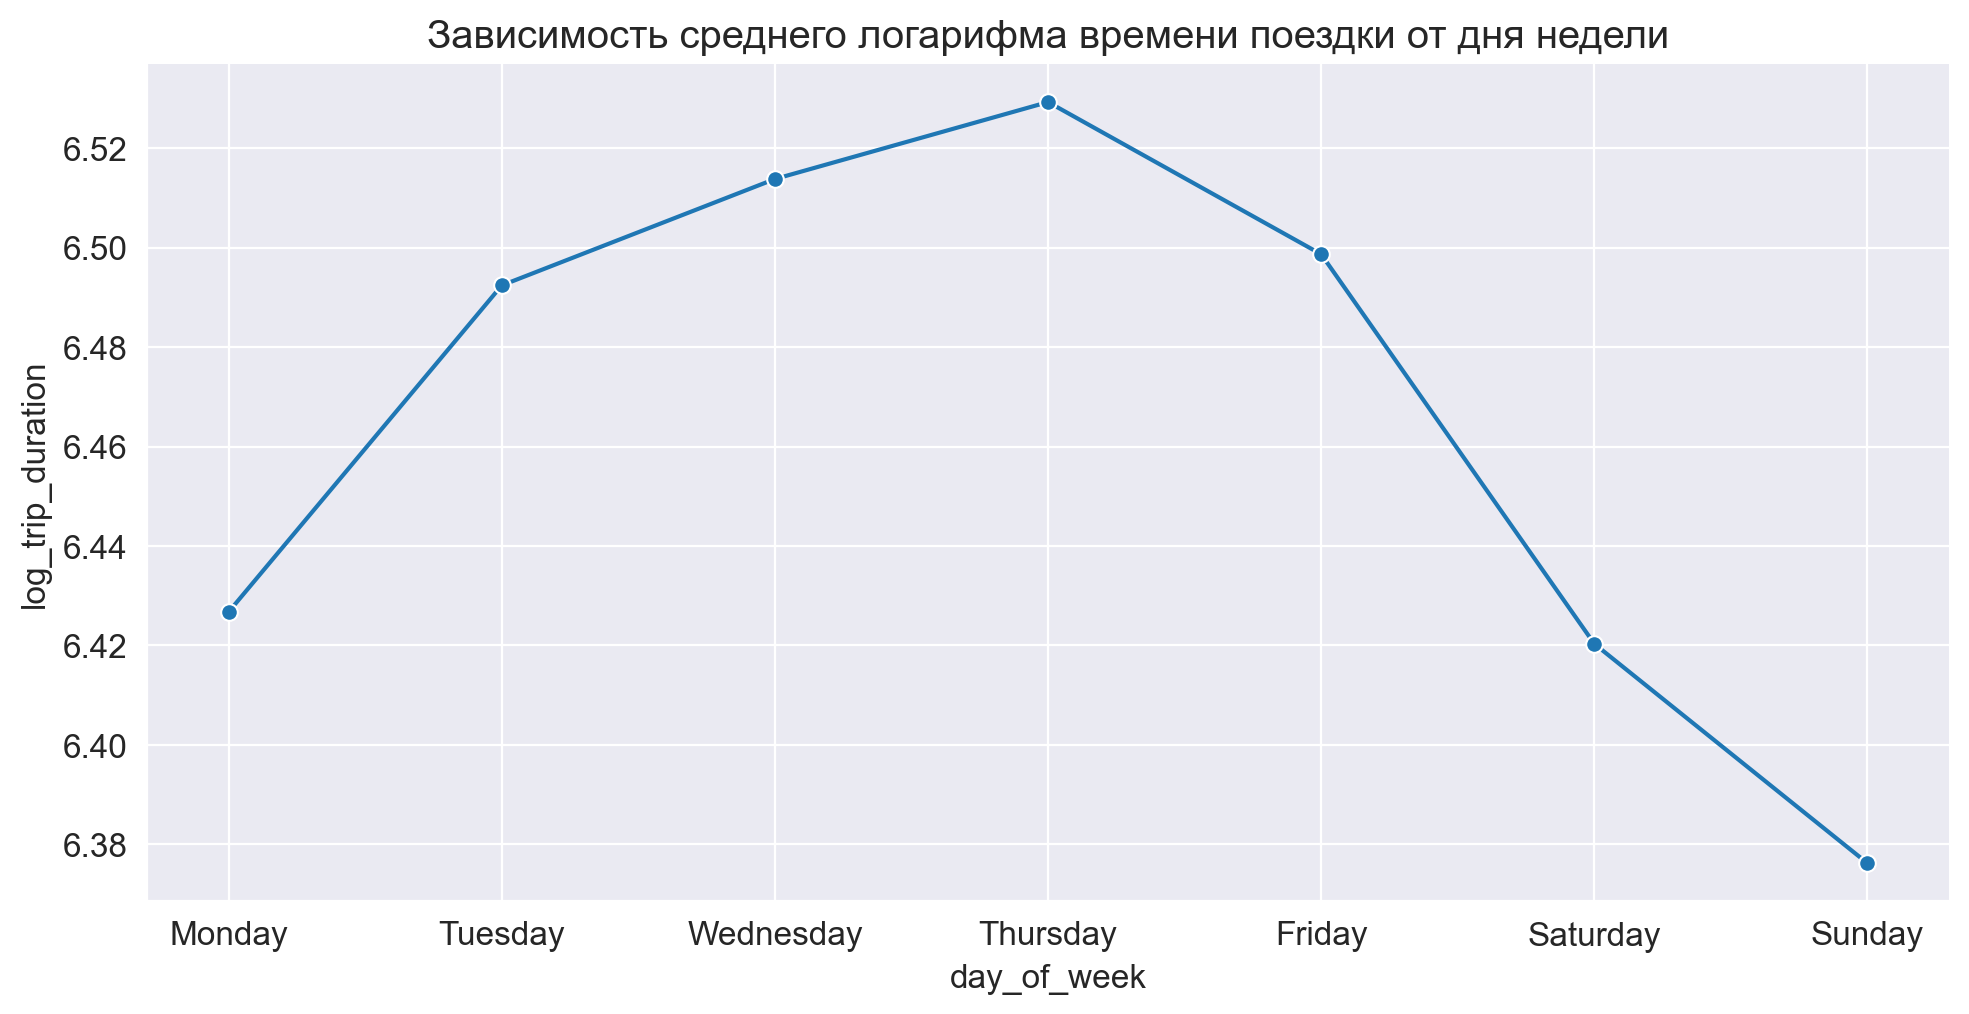

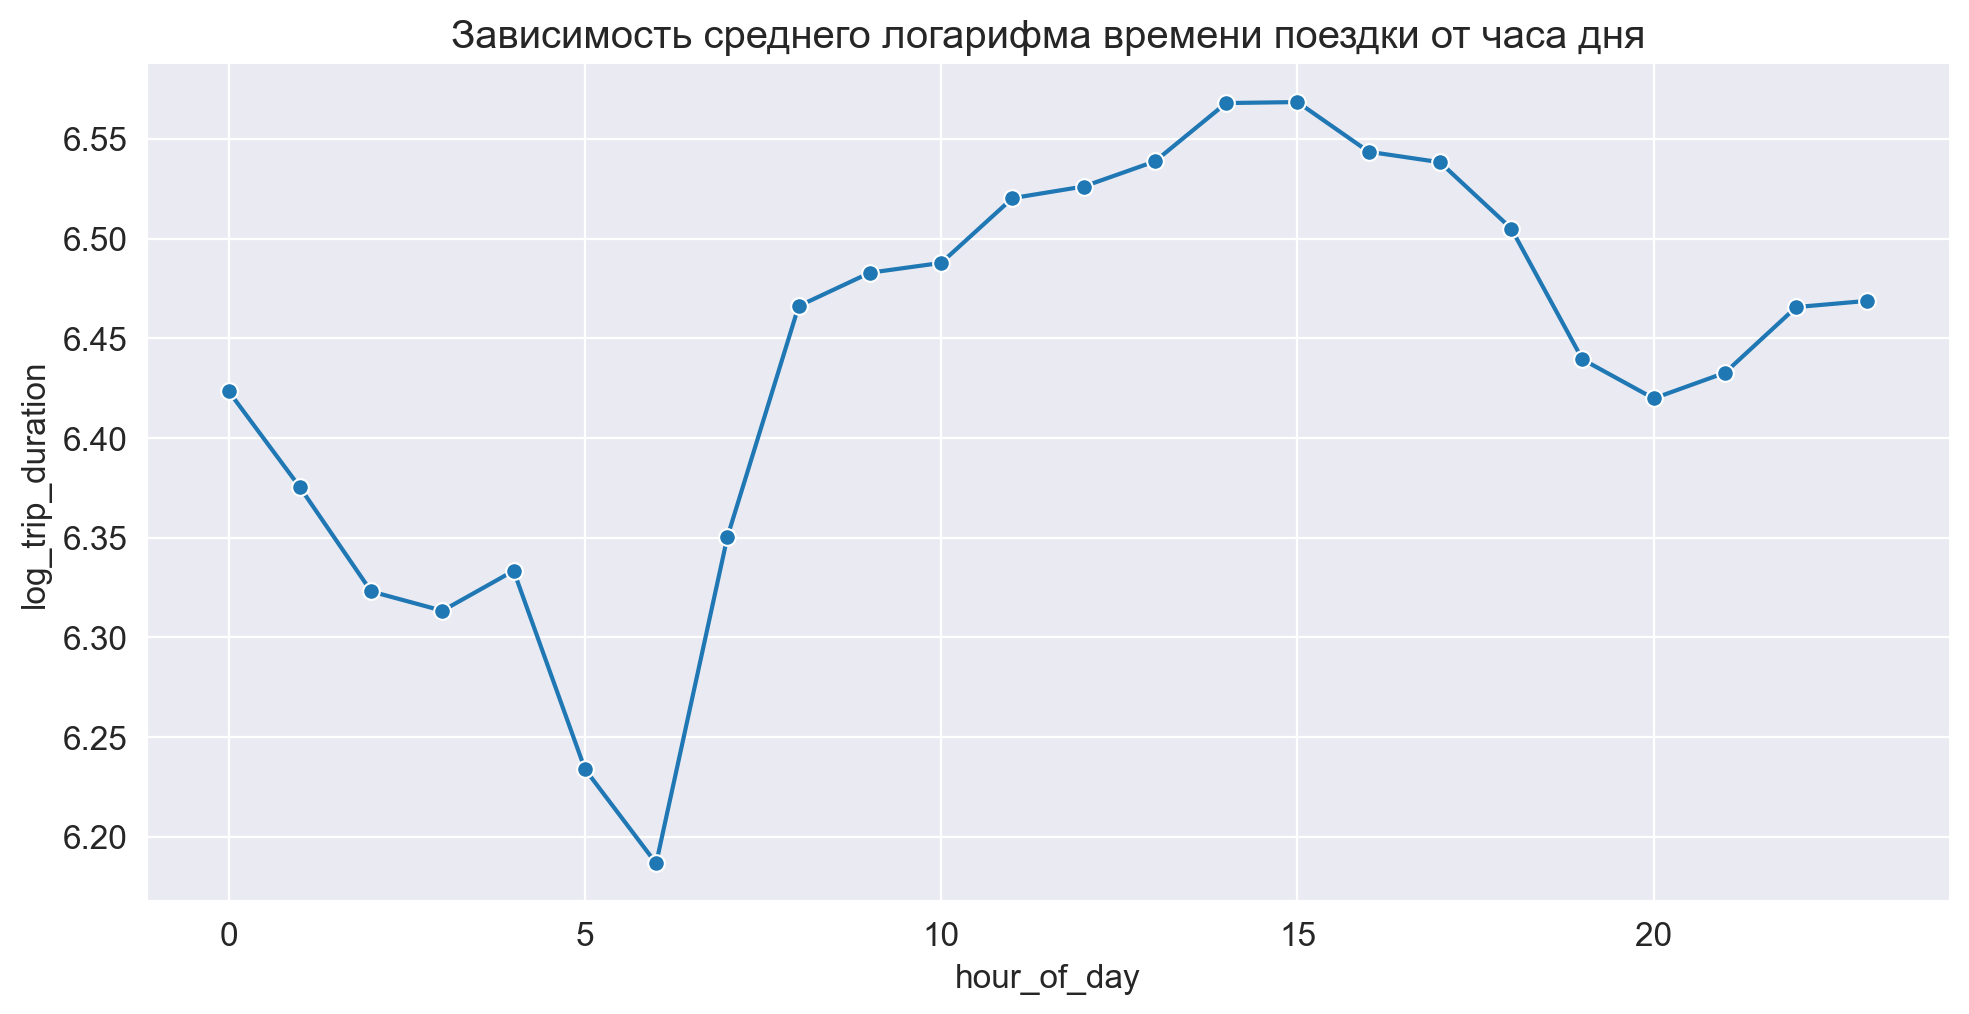

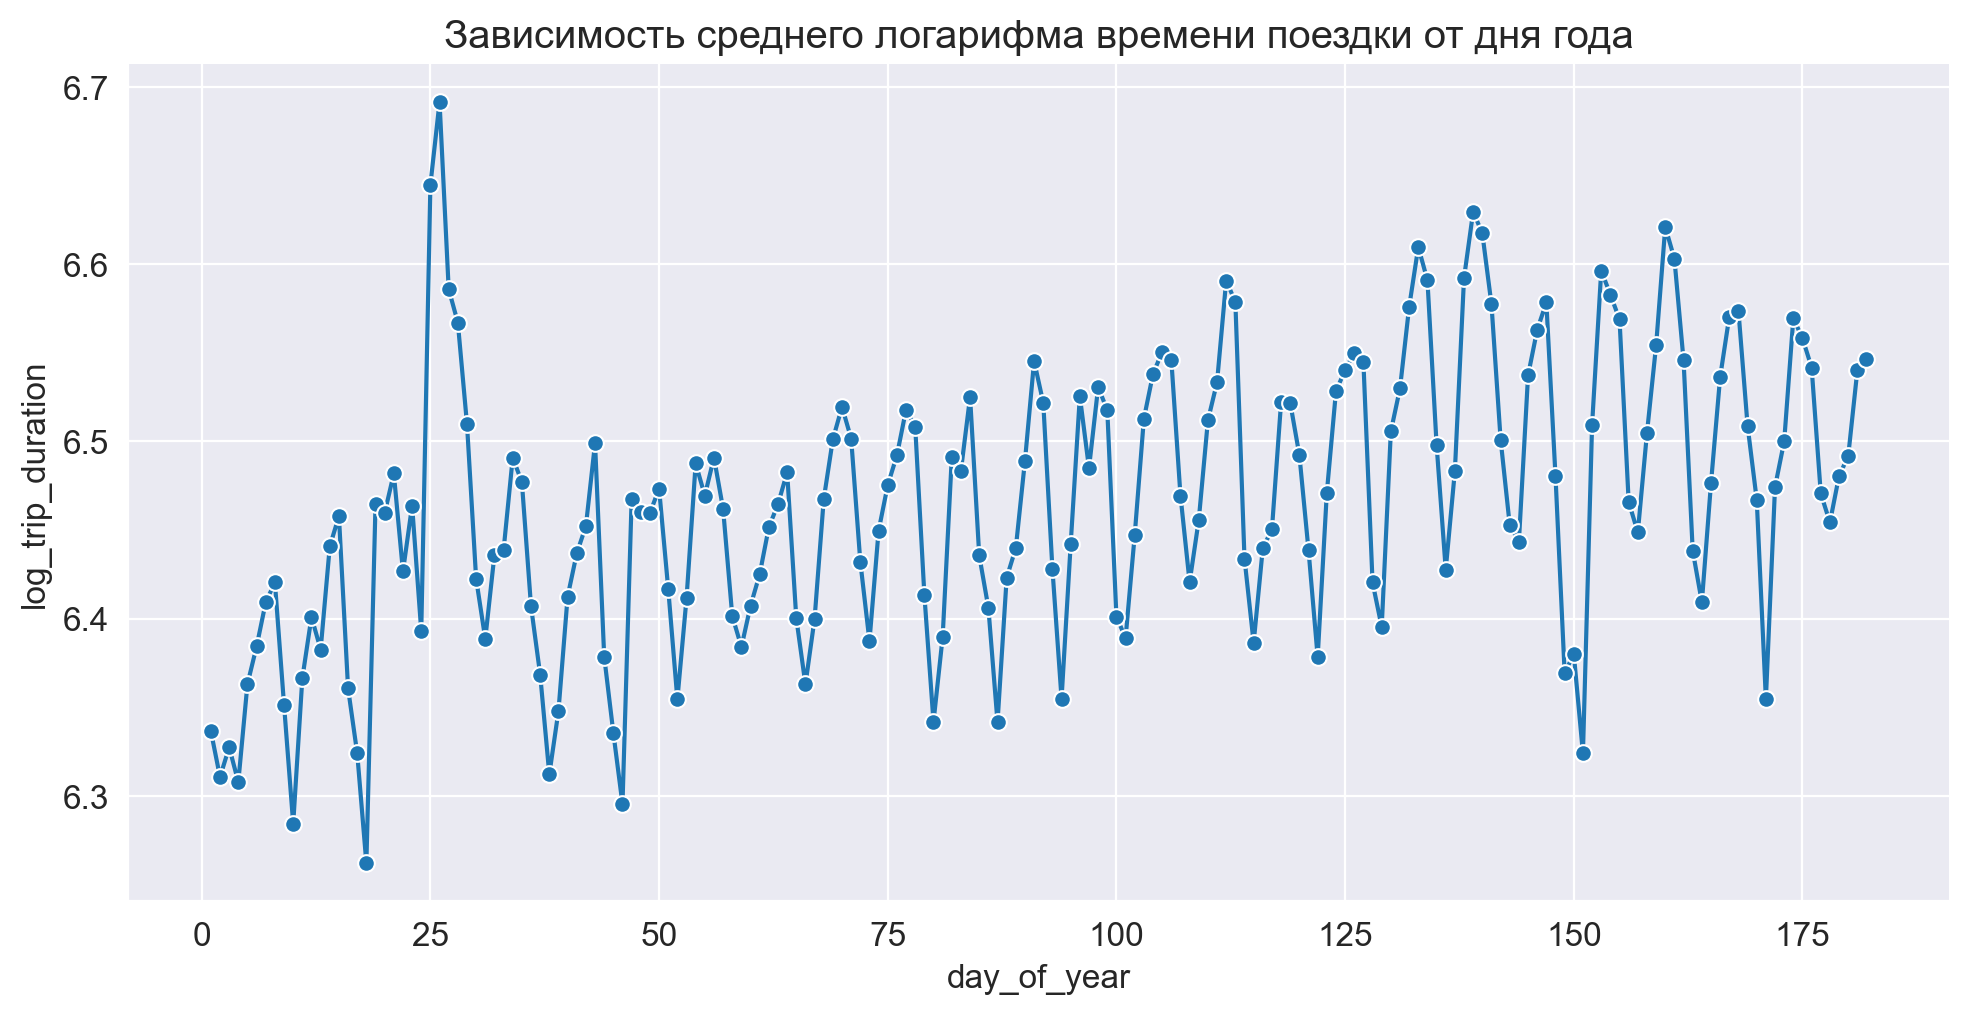

In [139]:
from sklearn.model_selection import train_test_split

y = data["log_trip_duration"]
X = data.drop(columns=["log_trip_duration"])
# делим на тестовую и обучающую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

data_train = X_train.copy()
data_train["log_trip_duration"] = y_train

mean_log_trips_day_of_week = data_train.groupby('day_of_week', observed=False)['log_trip_duration'].mean().reset_index()
mean_log_trips_hour_of_day = data_train.groupby('hour_of_day', observed=False)['log_trip_duration'].mean().reset_index()
mean_log_trips_day_of_year = data_train.groupby('day_of_year', observed=False)['log_trip_duration'].mean().reset_index()

# График по месяцам
sns.relplot(data=mean_log_trips_day_of_week, x='day_of_week', y='log_trip_duration', kind='line', aspect=2, marker='o')
plt.title('Зависимость среднего логарифма времени поездки от дня недели')
plt.show()
# График по месяцам
sns.relplot(data=mean_log_trips_hour_of_day, x='hour_of_day', y='log_trip_duration', kind='line', aspect=2, marker='o')
plt.title('Зависимость среднего логарифма времени поездки от часа дня')
plt.show()
# График по месяцам
sns.relplot(data=mean_log_trips_day_of_year, x='day_of_year', y='log_trip_duration', kind='line', aspect=2, marker='o')
plt.title('Зависимость среднего логарифма времени поездки от дня года')
plt.show()

**Вопрос (0.5 баллов)**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**

Графики дней недели выглядят в общем похоже - по будням заметно нарастание, а по выходным общий спад.
Графики времени суток похожи чуть сильнее - поскольку от количества вызовов такси растут пробки и увеличивается время поездки.

Насчет аномальных периодов - ~23 января, когда был снегопад, происходит увеличение длительности поездок на такси из-за плохо убранного города. 30 мая - длительности поездок также упали, поскольку меньше машин на дороге из-за запрета - быстрее движение

Тренд - увеличение длительности поездки с приближением середины года. Это может быть связано с тем, что летом люди перезжают в загородные дома и увеличивается время поездок до работы.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [140]:
# все признаки кроме аномалий уже были добавлены в предыдущих пунктах. Добавим аномалии

data['anomaly_period_1'] = data['day_of_year'].isin([23, 24, 25]).astype(int)
data['anomaly_period_2'] = (data['day_of_year'] == 151).astype(int)

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Ответ**

День недели и месяц являются категориальными, так как имеют ограниченное число возможных значений (например, понедельник, вторник и так далее), и между этими значениями нет числового порядка, который имел бы смысл в анализе данных.

Час и день в году являются численными, они имеют естественный числовой порядок и могут использоваться для вычисления временных интервалов.

**Задание 1.5 (1 балл)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [141]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score


In [142]:
X = data[['day_of_week', 'hour_of_day', 'month', 'anomaly_period_1', 'anomaly_period_2', 'day_of_year']]
y = data['log_trip_duration']

In [143]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numerical_features = ['hour_of_day', 'day_of_year']
categorical_features = ['day_of_week', 'month']

# Создание трансформеров для обработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Создание и обучение конвейера с Ridge регрессией
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

ridge_pipeline.fit(X_train, y_train)

y_pred = ridge_pipeline.predict(X_test)

# Расчет и вывод метрик
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse}")
print(f"Коэффициент детерминации (R²): {r2}")


Корень из среднеквадратичной ошибки (RMSE): 0.7919531099140837
Коэффициент детерминации (R²): 0.007717598411586479


## Линейная регрессия. Часть 2. (5 баллов)

Далее мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [144]:
import pandas as pd

data = pd.read_csv('diamonds.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 2.1 (0.1 баллов)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [145]:
print(data.isna().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


**Задача 2.2 (0.1 баллов)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [146]:
# выкидываем depth и table, так как они линейно связаны с размерами брилианта из описания датасета с kaggle
data.drop(columns=['depth', 'table'], inplace=True)

data.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


In [147]:
X = data.drop(columns=['price'])
y = data['price']

**Задача 2.3 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

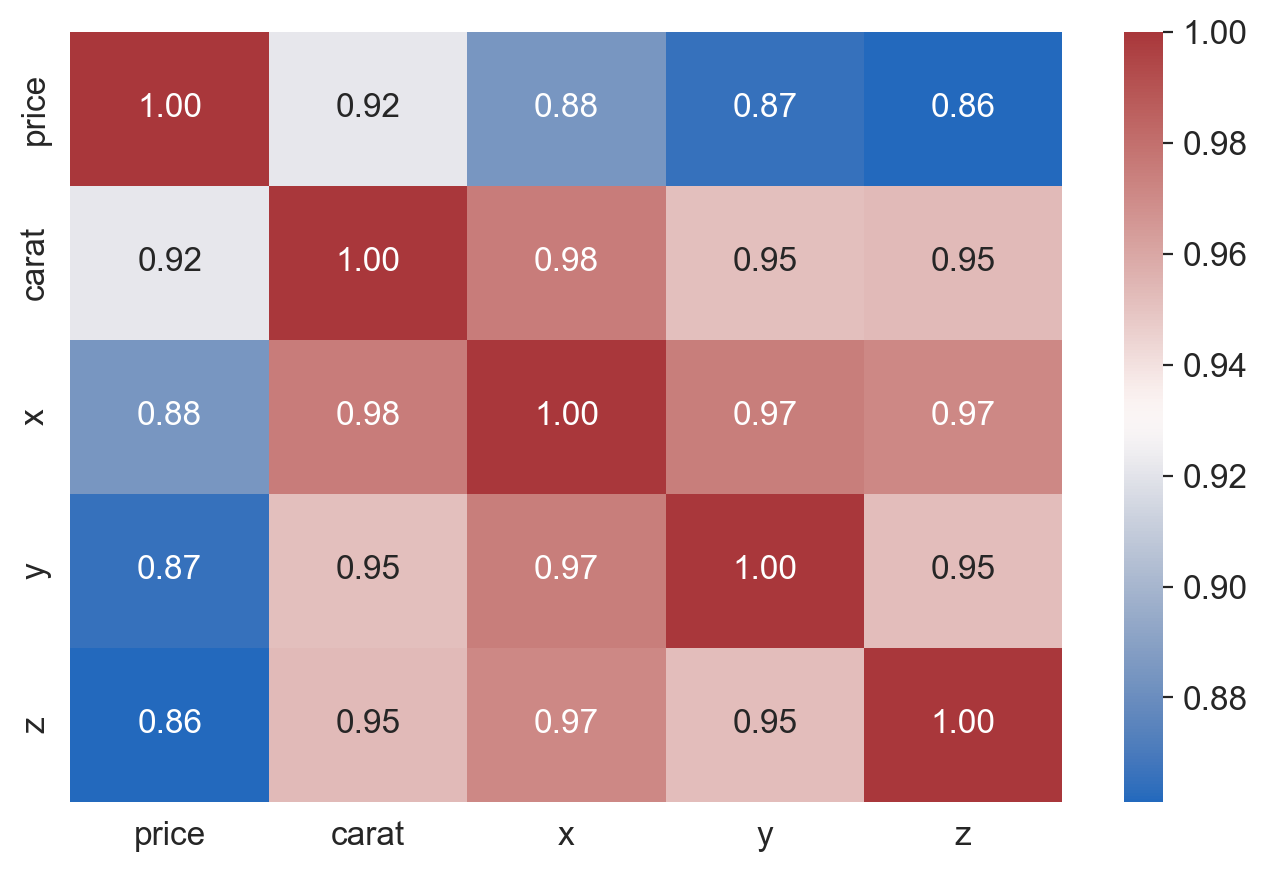

In [148]:
import seaborn as sns

sub_df = data[['price', 'carat', 'x', 'y', 'z']]
ax = sns.heatmap(sub_df.corr(), cmap="vlag", annot=True, fmt="0.2f")
for text_block in ax.texts:
    if abs(float(text_block.get_text())) >= 0.3:
        text_block.set_text(text_block.get_text())
    else:
        text_block.set_text("")

Больше всего с признаком price коррелирует признак carat, что логично, поскольку именно по ним оценивают их стоимость

**Задача 2.4 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [149]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical = list(data.dtypes[data.dtypes == "object"].index)

df = pd.DataFrame(data)

encoder = OneHotEncoder()

# Выполняем кодирование для всех категориальных столбцов
encoded_data = encoder.fit_transform(df[categorical])
encoded_data = encoded_data.toarray()

# Создаем DataFrame из закодированных данных
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical))

# Объединяем с исходным DataFrame, удаляя исходные категориальные столбцы
df_encoded = pd.concat([df.drop(columns=categorical), encoded_df], axis=1)

print(df_encoded)

       carat  price     x     y     z  cut_Fair  cut_Good  cut_Ideal  \
0       0.23    326  3.95  3.98  2.43       0.0       0.0        1.0   
1       0.21    326  3.89  3.84  2.31       0.0       0.0        0.0   
2       0.23    327  4.05  4.07  2.31       0.0       1.0        0.0   
3       0.29    334  4.20  4.23  2.63       0.0       0.0        0.0   
4       0.31    335  4.34  4.35  2.75       0.0       1.0        0.0   
...      ...    ...   ...   ...   ...       ...       ...        ...   
53935   0.72   2757  5.75  5.76  3.50       0.0       0.0        1.0   
53936   0.72   2757  5.69  5.75  3.61       0.0       1.0        0.0   
53937   0.70   2757  5.66  5.68  3.56       0.0       0.0        0.0   
53938   0.86   2757  6.15  6.12  3.74       0.0       0.0        0.0   
53939   0.75   2757  5.83  5.87  3.64       0.0       0.0        1.0   

       cut_Premium  cut_Very Good  ...  color_I  color_J  clarity_I1  \
0              0.0            0.0  ...      0.0      0.0       

**Задача 2.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [150]:
from sklearn.model_selection import train_test_split

y = df_encoded["price"]
X = df_encoded.drop(columns=["price"])

# делим на тестовую и обучающую выборку 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(X_train.head())
print(y_train.head())

(37758, 24) (16182, 24)
(37758,) (16182,)
       carat     x     y     z  cut_Fair  cut_Good  cut_Ideal  cut_Premium  \
23590   1.02  6.47  6.41  4.03       0.0       0.0        1.0          0.0   
20122   1.23  6.92  6.87  4.23       0.0       0.0        1.0          0.0   
41416   0.53  5.18  5.21  3.24       0.0       0.0        1.0          0.0   
19392   1.50  7.24  7.33  4.58       0.0       0.0        0.0          0.0   
48949   0.70  5.73  5.69  3.52       0.0       0.0        1.0          0.0   

       cut_Very Good  color_D  ...  color_I  color_J  clarity_I1  clarity_IF  \
23590            0.0      0.0  ...      0.0      0.0         0.0         1.0   
20122            0.0      0.0  ...      0.0      0.0         0.0         1.0   
41416            0.0      0.0  ...      0.0      0.0         0.0         0.0   
19392            1.0      0.0  ...      0.0      0.0         0.0         0.0   
48949            0.0      0.0  ...      0.0      1.0         0.0         0.0   

       c

**Задача 2.6 (0.4 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [151]:
from sklearn.preprocessing import StandardScaler

numeric_features = list(data.dtypes[data.dtypes != "object"].index)
numeric_features.pop(numeric_features.index('price'))

print('numeric_features:', numeric_features)
print(len(numeric_features))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

for i, name in enumerate(numeric_features):
    X_train[name] = X_train_scaled[:, i]
    X_test[name] = X_test_scaled[:, i]

print(X_train.head())
print(X_test.head())


numeric_features: ['carat', 'x', 'y', 'z']
4
          carat         x         y         z  cut_Fair  cut_Good  cut_Ideal  \
23590  0.476637  0.665760  0.609753  0.714144       0.0       0.0        1.0   
20122  0.922237  1.068266  1.021402  1.002914       0.0       0.0        1.0   
41416 -0.563099 -0.488091 -0.464115 -0.426497       0.0       0.0        1.0   
19392  1.495153  1.354492  1.433051  1.508261       0.0       0.0        0.0   
48949 -0.202374  0.003861 -0.034568 -0.022219       0.0       0.0        1.0   

       cut_Premium  cut_Very Good  color_D  ...  color_I  color_J  clarity_I1  \
23590          0.0            0.0      0.0  ...      0.0      0.0         0.0   
20122          0.0            0.0      0.0  ...      0.0      0.0         0.0   
41416          0.0            0.0      0.0  ...      0.0      0.0         0.0   
19392          0.0            1.0      0.0  ...      0.0      0.0         0.0   
48949          0.0            0.0      0.0  ...      0.0      1.0    

**Задача 2.7 (0.3 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

print(y_train)
print(y_pred)

Test MSE = 1322763.1078
Train MSE = 1271958.8414
23590    11605
20122     8585
41416     1226
19392     8058
48949     2047
         ...  
28017      658
50496     2269
29199      694
40061     1113
17673     7125
Name: price, Length: 37758, dtype: int64
[ 5649.  4070.  5017. ... 12923.  1455.  7591.]


**Задача 2.8 (0.3 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [153]:
coefs = {X_train.columns[i]: model.coef_[i] for i in range(len(model.coef_))}

numeric_coefs = []
print("Оценки коэффициентов вещественных переменных:")
for feat in numeric_features:
    numeric_coefs.append(coefs[feat])
    print(feat, coefs[feat])
print()

for feat in numeric_features:
    numeric_coefs.append(coefs[feat])

numeric_coefs = np.array(numeric_coefs)


print("Оценки коэффициентов, которые по модулю на порядок превышают оценки прочих вещественных переменных:")
for i, feat in enumerate(numeric_features):
    if numeric_coefs[i] > numeric_coefs.mean():
        print(feat, numeric_coefs[i])


Оценки коэффициентов вещественных переменных:
carat 5241.590672168619
x -765.7459814517354
y 124.57601150386998
z -453.8147597182886

Оценки коэффициентов, которые по модулю на порядок превышают оценки прочих вещественных переменных:
carat 5241.590672168619


**Задача 2.9 (0.5 баллов)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [154]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

print("Initial weights:")
print(model.coef_)

model = Lasso(10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Lasso Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Lasso Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))
print()

print("Lasso weights:")
print(model.coef_)

model = Ridge(10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Ridge Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Ridge Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))
print()

print("Ridge weights:")
print(model.coef_)


Initial weights:
[ 5.24159067e+03 -7.65745981e+02  1.24576012e+02 -4.53814760e+02
  3.68215880e+14  3.68215880e+14  3.68215880e+14  3.68215880e+14
  3.68215880e+14  3.31624971e+14  3.31624971e+14  3.31624971e+14
  3.31624971e+14  3.31624971e+14  3.31624971e+14  3.31624971e+14
  5.98100868e+15  5.98100868e+15  5.98100868e+15  5.98100868e+15
  5.98100868e+15  5.98100868e+15  5.98100868e+15  5.98100868e+15]
Lasso Test MSE = 1366941.1523
Lasso Train MSE = 1308745.4349

Lasso weights:
[ 4784.36215914  -253.12942101    -0.          -461.0693689
  -590.88360344   -67.0281112    166.30522673     0.
     0.           321.05476526   156.0565952    105.93068656
    -0.          -444.18547315  -851.66082258 -1619.60190329
 -3583.10401739   681.03367084  -637.09581891 -1535.64278327
   161.60362157   -21.42855327   522.08321527   507.58507596]
Ridge Test MSE = 1322683.3449
Ridge Train MSE = 1272051.8442

Ridge weights:
[ 5206.74389374  -732.978672     120.86128011  -452.14232408
  -692.6087647     

**Ответ**

Веса изменились сильно. Из этого видно, что проблема мультиколлинеарности была в изначальной регрессии 

**Задача 2.10 (0.7 баллов)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

c:\Users\roman\Documents\Sirius\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.201e+07, tolerance: 5.933e+07
  model = cd_fast.enet_coordinate_descent(


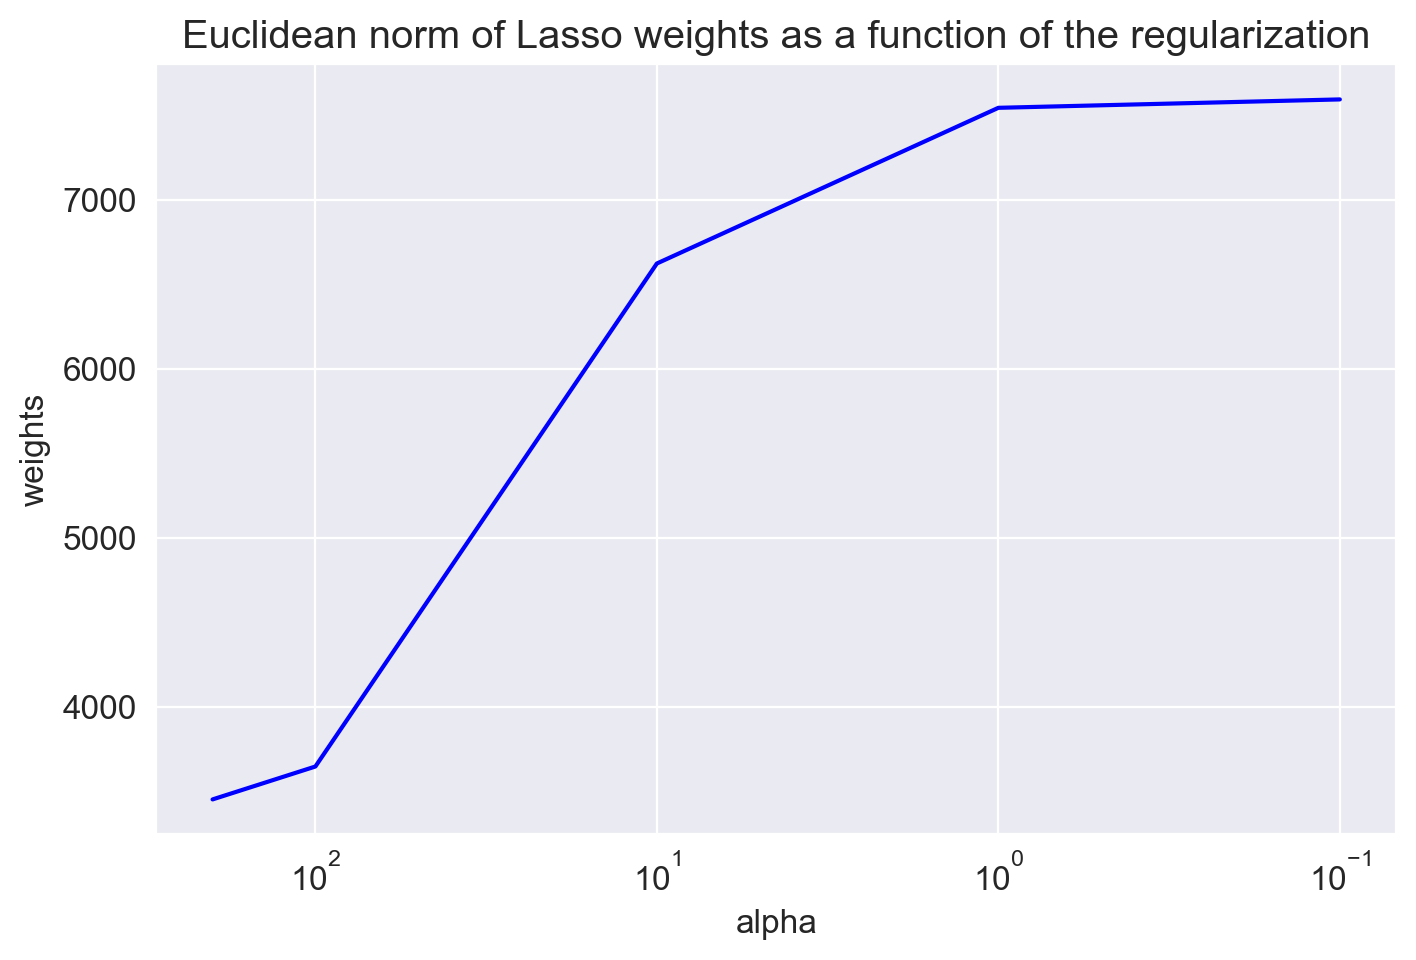

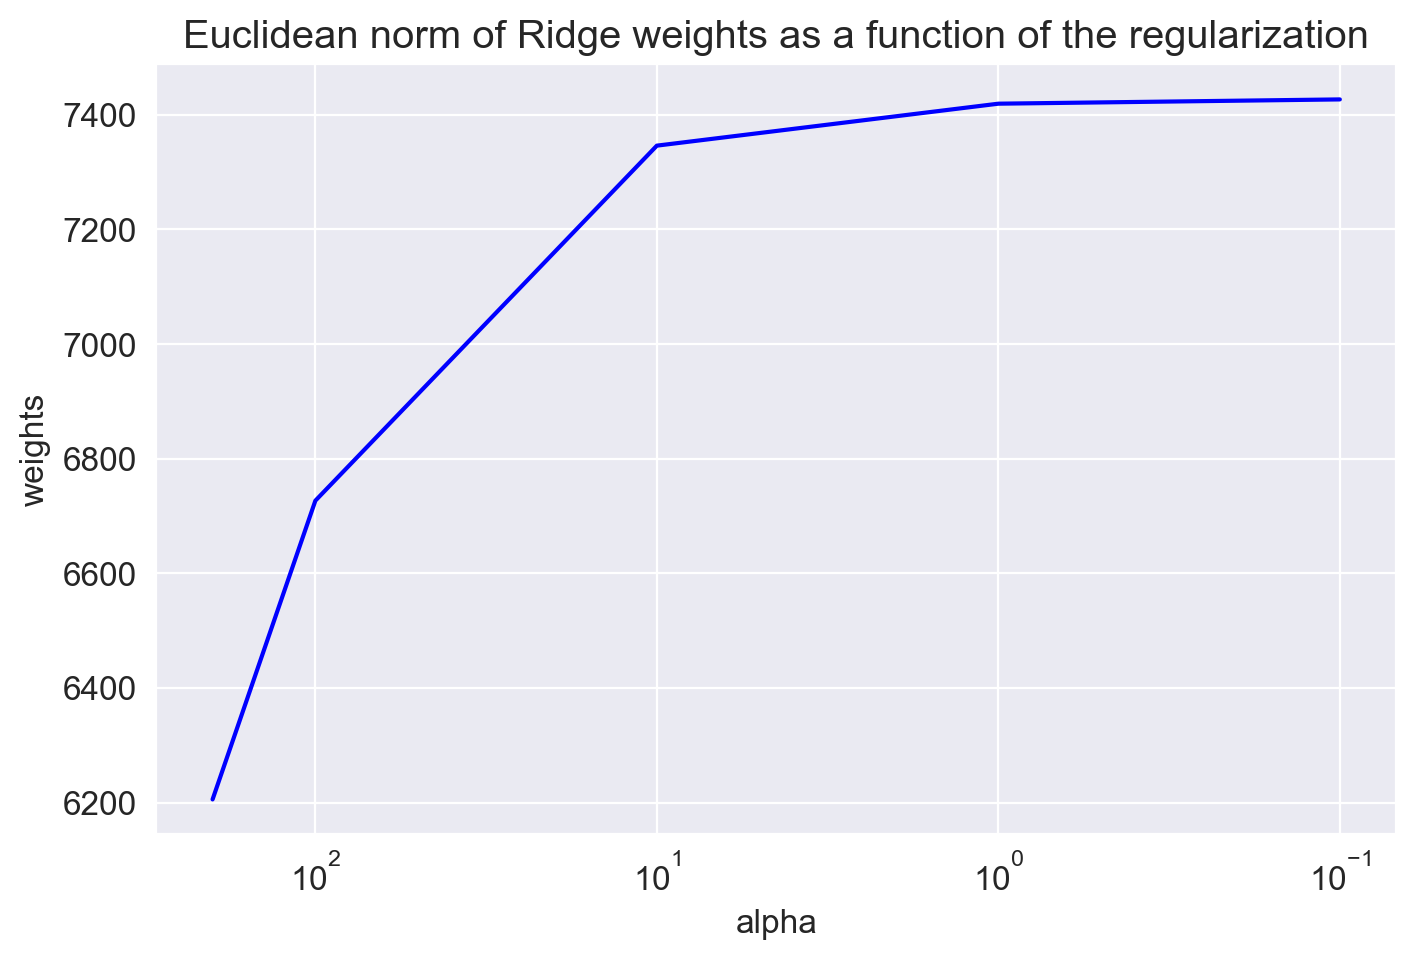

In [155]:
from cycler import cycler

alphas = np.array([0.1, 1, 10, 100, 200])

model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train, y_train)
    coefs.append(model.coef_)

coefs = np.linalg.norm(coefs, axis=1)

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Euclidean norm of Lasso weights as a function of the regularization")
plt.axis("tight")
plt.show()

model = Ridge()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train, y_train)
    coefs.append(model.coef_)

coefs = np.linalg.norm(coefs, axis=1)

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Euclidean norm of Ridge weights as a function of the regularization")
plt.axis("tight")
plt.show()


**Ответ**

Агрессивнее зануляет веса Лассо регрессия. Ее также используют для отбора признаков, поскольку у нее есть способность занулять веса.

**Задача 2.11 (0.8 баллов)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [156]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

alphas = np.array([0.1, 1, 10, 100, 200])
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X, y)

errors = lasso_cv.mse_path_.mean(axis=1)
best_alpha = lasso_cv.alphas_[errors.argmin()]
print("Error by alphas:", errors)
print("Best alpha:", best_alpha)


Error by alphas: [2437809.78962446 2255925.29451376 1323632.28436761 1287497.08231447
 1287580.64115965]
Best alpha: 1.0


**Задача 2.12 (0.6 баллов)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [157]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

model = Lasso(best_alpha)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Lasso Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Lasso Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))


print(model.coef_)

Lasso Test MSE = 1322490.0663
Lasso Train MSE = 1272473.2845
[ 5197.31301343  -629.50602606    21.22908072  -450.63104234
  -848.22176035  -173.02748518   154.31651669     8.1723117
     0.           454.06920639   252.92577344   191.78877774
     0.          -496.65290222  -965.39194766 -1830.11058887
 -4334.09820132   948.68698585  -695.95399357 -1648.14900665
   217.80444029   -87.47013706   637.5587254    578.45459917]


In [162]:
index_bad = range(len(model.coef_))

for i in index_bad:
    print(X_train.columns[i])

carat
x
y
z
cut_Fair
cut_Good
cut_Ideal
cut_Premium
cut_Very Good
color_D
color_E
color_F
color_G
color_H
color_I
color_J
clarity_I1
clarity_IF
clarity_SI1
clarity_SI2
clarity_VS1
clarity_VS2
clarity_VVS1
clarity_VVS2


In [158]:
# Данный код выводит информативные и неифнормативные признаки

indexes_good = [0, 16]
index_bad = [8, 12]

for i in indexes_good:
    print('good column:', X_train.columns[i])

for i in index_bad:
    print('bad column:', X_train.columns[i])

good column: carat
good column: clarity_I1
bad column: cut_Very Good
bad column: color_G


**Ответ**

Наиболее информативным признаком оказались карат (что было замечено и ранее), а также чистота I1 - которая является самой лучшей среди брилиантов с небольшим вкраплением.
Неинформативными же признаками оказались - уровень огранки Good - средняя оценка брилиантов, и G цвет брилианта - что странно, потому что Гугл пишет, что G брилианты довольно хороши.

Причина таких результатов моджет быть в следующем - караты напрямую влияют на стоимость брилиантов, так как отражают их вес; чистота I1 позволяет увидеть изъяны брилианта невооруженным взглядом - и это понижает стоимость; уровень же огранки и цвет брилианта может быть наоборот незаметен для НЕ профи - и поэтому на цену вляет плохо.

**Задача 2.13 (0.7 баллов)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [159]:
print("y_test:", y_test.values[:5])
print("y_pred:", y_pred[:5])

y_test: [4330 3008 4537 3257 2513]
y_pred: [5649.88288801 4056.12831526 5031.87777097 4121.30731205 3096.66796261]


**Ответ**

Lasso: Test MSE = 1322490.0663

Linear Regression: Test MSE = 1322763.1078


Lasso лучше использовать для предсказаний, поскольку MSE получилось меньше. Предположительно, это связано тем, что были отброшены коэффиценты признаков, которые являлись причиной мультиколлинеарности.

## Творческий Бонус (0.05 балл)

Учиться - это, конечно, хорошо, но важно не забывать отдыхать, посвящать время себе и близким. Выберете рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека этим блюдом. Кратко опишите ваши впечатления, прикрепите рецепт, фотографии блюда и довольного гостя.

`### ваш кулинарный опыт здесь ###`

## Оценка работы (посчитайте ваши набранные баллы)

In [160]:
10.0

10.0